In [26]:
import tensorflow as tf
import tensorflow as tf
import keras
from keras import layers
from keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, average_precision_score, PrecisionRecallDisplay, RocCurveDisplay

import matplotlib.pyplot as plt

import scipy.stats as stats
import numpy as np 
import pandas as pd

In [27]:
RANDOM_SEED = 42

In [28]:
# read in data
DF = pd.read_csv(
    './data/wdbc.data',
    names=[
        'ID',
        'diagnosis',
        'radius1',
        'texture1',
        'perimeter1',
        'area1',
        'smoothness1',
        'compactness1',
        'concavity1',
        'concave_points1',
        'symmetry1',
        'fractal_dimension1',
        'radius2',
        'texture2',
        'perimeter2',
        'area2',
        'smoothness2',
        'compactness2',
        'concavity2',
        'concave_points2', 
        'symmetry2', 
        'fractal_dimension2', 
        'radius3', 
        'texture3', 
        'perimeter3', 
        'area3', 
        'smoothness3', 
        'compactness3', 
        'concavity3',
        'concave_points3',
        'symmetry3',
        'fractal_dimension3'
    ]
)

DF.head()

,ID,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
DF.to_csv('./data/wdbc.csv', index=False) #create proper csv file

In [30]:
df = DF.copy()

df.drop('ID', axis=1, inplace=True) # the ID column is not useful for our analysis

# check for null values in data (further analysis may be required in null values are present)
print("Data has Null values") if True in df.isna() else print("Data has no Null values")

Data has no Null values


In [31]:
# divide the dataframe into features and labels
x, y = df.drop('diagnosis', axis=1), df['diagnosis'].apply(lambda label: 1 if label == 'M' else 0) # convert the labels to digits (M = malignat and is thus the positive class)

In [32]:
# check data distribution
print(f'The ratio of neg to pos is: {y.value_counts()[0] / y.value_counts().sum():.2f} to {y.value_counts()[1] / y.value_counts().sum():.2f}')

The ratio of neg to pos is: 0.63 to 0.37


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=RANDOM_SEED)

In [34]:
# convert the labels to one-hot encoding
y_train = tf.one_hot(y_train, depth=2)
y_val = tf.one_hot(y_val, depth=2)
y_test = tf.one_hot(y_test, depth=2)

### Experiment 1

In [35]:
m = keras.Sequential([
    layers.Input((30,)),
    layers.Dense(32, activation='relu'), # using 32 rather than 64
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(2) # outputs logits
])

m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,730 (10.66 KB)

 Trainable params: 2,730 (10.66 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# m.save_weights('tf_model_weights/model_inits.weights.h5')

m.load_weights('tf_model_weights\model_init.weights.h5')

In [37]:
m.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001), # lower lr becuz of high epochs  
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[metrics.CategoricalAccuracy(), metrics.AUC(from_logits=True), metrics.AUC(curve='PR', from_logits=True)]
)

In [ ]:
history = m.fit(
    x_train,
    y_train,
    batch_size=8,
    epochs=200, 
    verbose=2, 
    validation_data=(x_val, y_val)
)

In [187]:
m.save_weights('tf_model_weights/model_final.weights.h5')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
TRAINING DATA


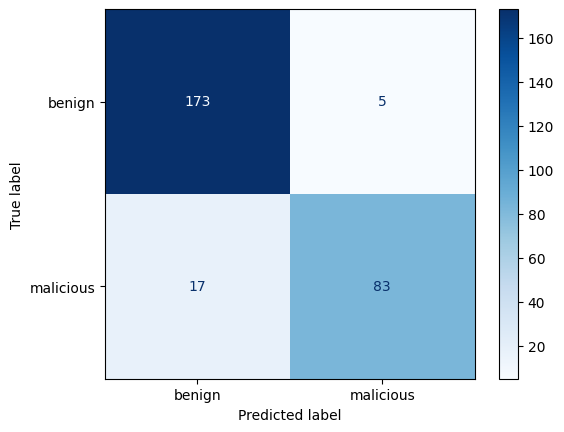

In [39]:
# Create confusion matrix for training data
y_train_pred = m.predict(x_train);
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true_classes = np.argmax(y_train, axis=1)

conf_matrix = confusion_matrix(y_train_true_classes, y_train_pred_classes)

print('TRAINING DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malicious']).plot(cmap='Blues'); 

In [40]:
# Train Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_train_true_classes, y_train_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_train_true_classes, y_train_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.920863309352518
Classification Report:
              precision    recall  f1-score   support

      benign       0.91      0.97      0.94       178
   malignant       0.94      0.83      0.88       100

    accuracy                           0.92       278
   macro avg       0.93      0.90      0.91       278
weighted avg       0.92      0.92      0.92       278



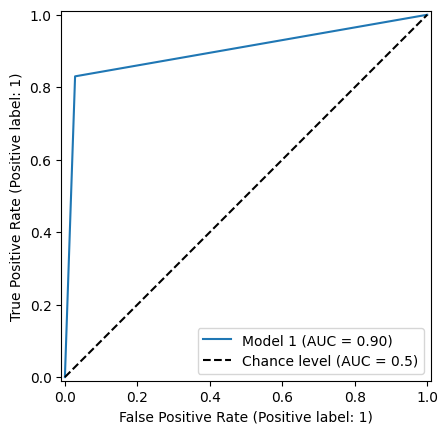

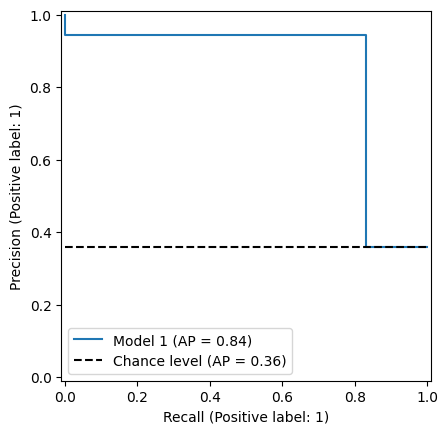

In [49]:
RocCurveDisplay.from_predictions(
    y_train_true_classes, y_train_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_train_true_classes, y_train_pred_classes, name="Model 1", plot_chance_level=True
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
VAL DATA


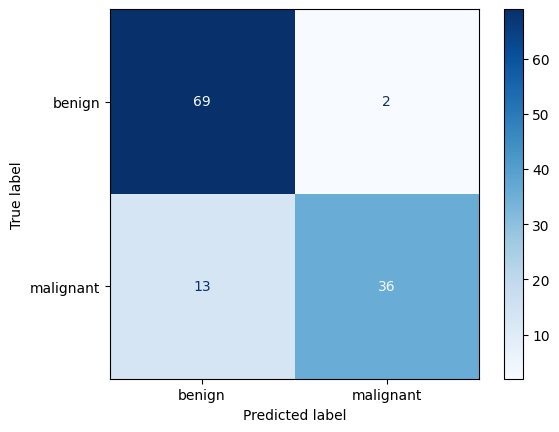

In [41]:
# Create confusion matrix for validation data
y_val_pred = m.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
print('VAL DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malignant']).plot(cmap='Blues');

In [42]:
# Validation Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_val_true_classes, y_val_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_val_true_classes, y_val_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

      benign       0.84      0.97      0.90        71
   malignant       0.95      0.73      0.83        49

    accuracy                           0.88       120
   macro avg       0.89      0.85      0.86       120
weighted avg       0.88      0.88      0.87       120



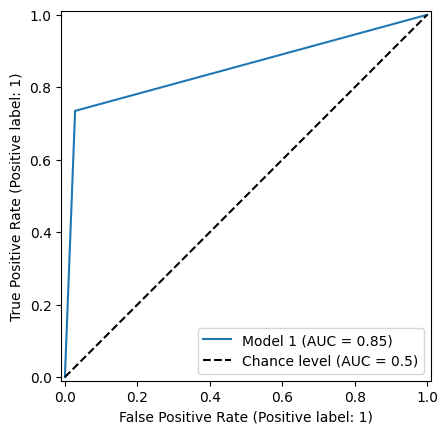

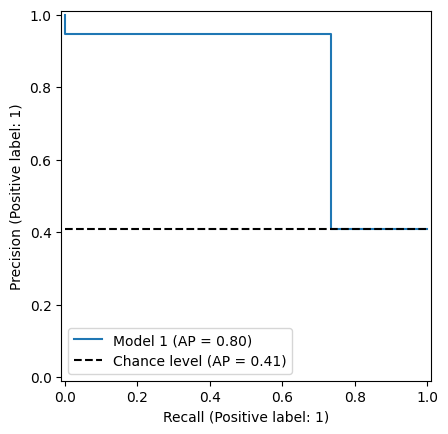

In [48]:
RocCurveDisplay.from_predictions(
    y_val_true_classes, y_val_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_val_true_classes, y_val_pred_classes, name="Model 1", plot_chance_level=True
)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
TEST DATA


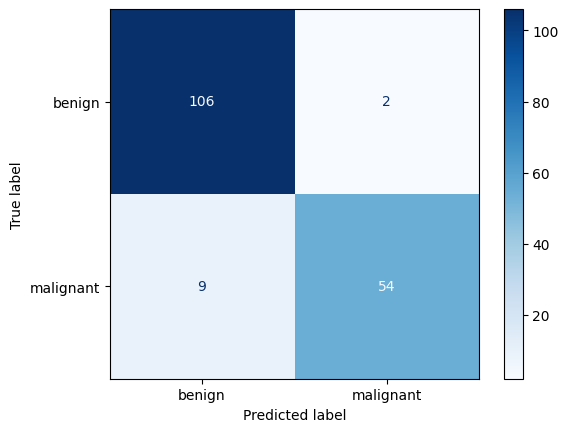

In [19]:
# Create confusion matrix for test data
y_test_pred = m.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)

print('TEST DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malignant']).plot(cmap='Blues');

In [166]:
# Test Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_test_true_classes, y_test_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_test_true_classes, y_test_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.935672514619883
Classification Report:
              precision    recall  f1-score   support

      benign       0.92      0.98      0.95       108
   malignant       0.96      0.86      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



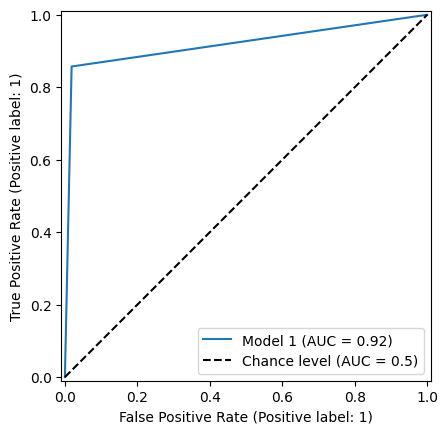

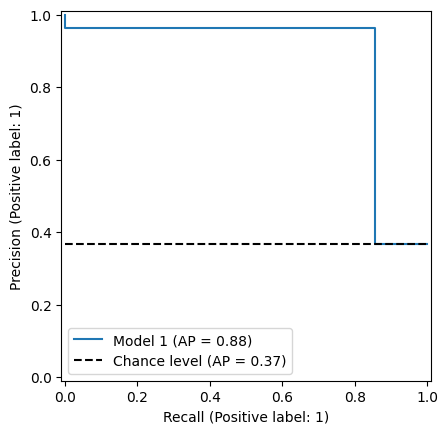

In [50]:
RocCurveDisplay.from_predictions(
    y_test_true_classes, y_test_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_test_true_classes, y_test_pred_classes, name="Model 1", plot_chance_level=True
)

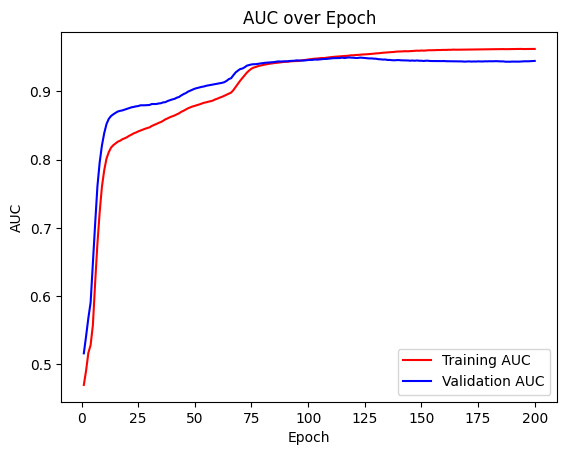

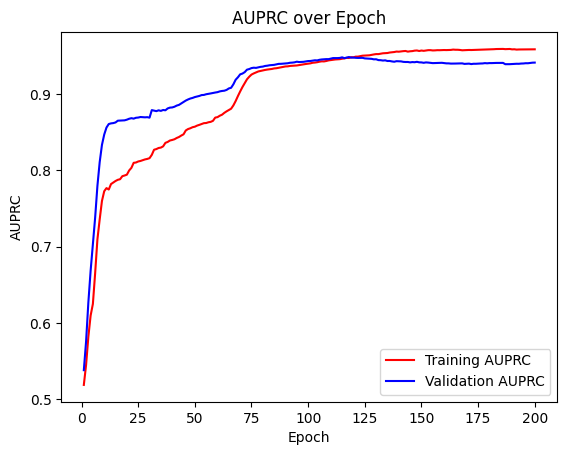

In [186]:
# plot the AUC and AUPRC 
# source: https://stackoverflow.com/questions/63483337/how-can-i-plot-training-accuracy-training-loss-with-respect-to-epochs-in-tensor

auc = history.history['auc_22']
val_auc = history.history['val_auc_22']

auprc = history.history['auc_23']
val_auprc = history.history['val_auc_23']

epochs = range(1, len(auc) + 1)
plt.plot(epochs, auc, 'r', label='Training AUC')
plt.plot(epochs, val_auc, 'b', label='Validation AUC')
plt.legend()
plt.title('AUC over Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.figure()
plt.plot(epochs, auprc, 'r', label='Training AUPRC')
plt.plot(epochs, val_auprc, 'b', label='Validation AUPRC')
plt.legend()
plt.title('AUPRC over Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUPRC')

plt.show()


**Experiment 1 Accuracy Results**
- Training Accuracy: 0.920863309352518
- Validation Accuracy: 0.875
- Test Accuracy: 0.935672514619883

### Experiment 2

In [51]:
m2 = keras.Sequential([
    layers.Input((30,)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1, seed=RANDOM_SEED),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(2),
])

m2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,730 (10.66 KB)

 Trainable params: 2,730 (10.66 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
m2.load_weights('./tf_model_weights/model_init.weights.h5')

In [53]:
m2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001), # lower lr becuz of high epochs  
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[metrics.CategoricalAccuracy(), metrics.AUC(from_logits=True), metrics.AUC(curve='PR', from_logits=True)]
)

In [54]:
# weight the positive class with neg_count/pos_count
cls_1_weight = (np.argmax(y_train, axis=1) == 0).sum() / (np.argmax(y_train, axis=1) == 1).sum()
cls_0_weight = 1

In [ ]:
history = m2.fit(
    x_train,
    y_train,
    batch_size=8,
    epochs=200, 
    verbose=2, 
    validation_data=(x_val, y_val), 
    class_weight={0: cls_0_weight, 1: cls_1_weight}
    )

In [217]:
m2.save_weights('tf_model_weights/model2_final.weights.h5')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
TRAINING DATA


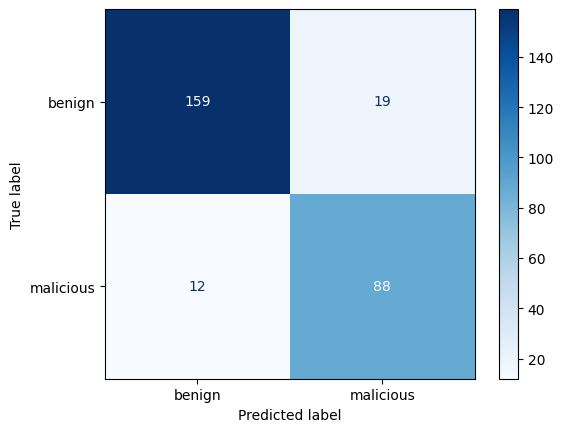

In [56]:
# Create confusion matrix for training data
y_train_pred = m2.predict(x_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true_classes = np.argmax(y_train, axis=1)

conf_matrix = confusion_matrix(y_train_true_classes, y_train_pred_classes)

print('TRAINING DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malicious']).plot(cmap='Blues')


In [57]:
# Train Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_train_true_classes, y_train_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_train_true_classes, y_train_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.8884892086330936
Classification Report:
              precision    recall  f1-score   support

      benign       0.93      0.89      0.91       178
   malignant       0.82      0.88      0.85       100

    accuracy                           0.89       278
   macro avg       0.88      0.89      0.88       278
weighted avg       0.89      0.89      0.89       278



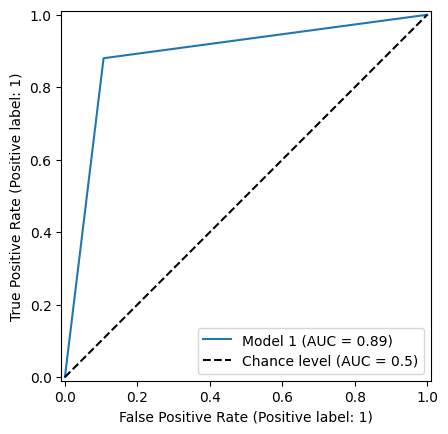

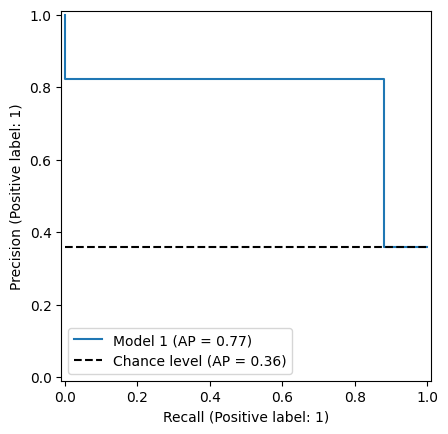

In [58]:
RocCurveDisplay.from_predictions(
    y_train_true_classes, y_train_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_train_true_classes, y_train_pred_classes, name="Model 1", plot_chance_level=True
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
VAL DATA


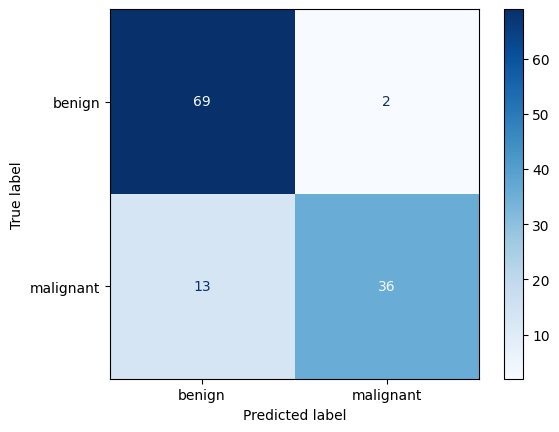

In [59]:
# Create confusion matrix for validation data
y_val_pred = m2.predict(x_val)
y_val_pred_clas2ses = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
print('VAL DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malignant']).plot(cmap='Blues')

In [60]:
# Validation Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_val_true_classes, y_val_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_val_true_classes, y_val_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

      benign       0.84      0.97      0.90        71
   malignant       0.95      0.73      0.83        49

    accuracy                           0.88       120
   macro avg       0.89      0.85      0.86       120
weighted avg       0.88      0.88      0.87       120



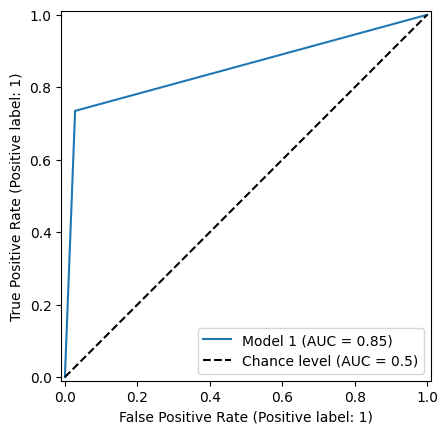

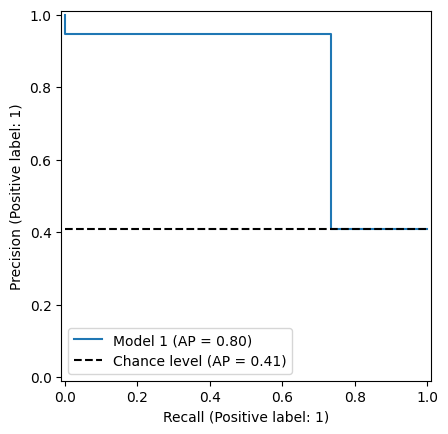

In [61]:
RocCurveDisplay.from_predictions(
    y_val_true_classes, y_val_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_val_true_classes, y_val_pred_classes, name="Model 1", plot_chance_level=True
)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
TEST DATA


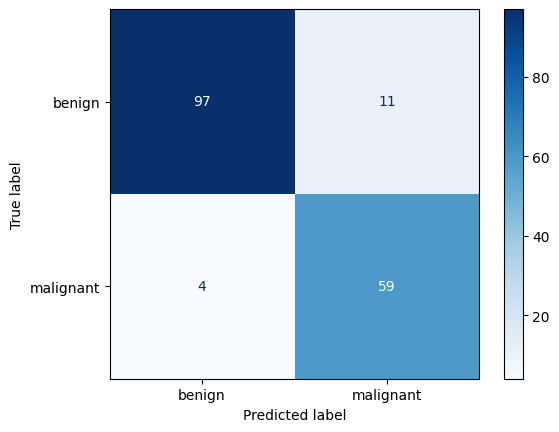

In [62]:
# Create confusion matrix for test data
y_test_pred = m2.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)

print('TEST DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malignant']).plot(cmap='Blues')

In [63]:
# Test Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_test_true_classes, y_test_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_test_true_classes, y_test_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.9122807017543859
Classification Report:
              precision    recall  f1-score   support

      benign       0.96      0.90      0.93       108
   malignant       0.84      0.94      0.89        63

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



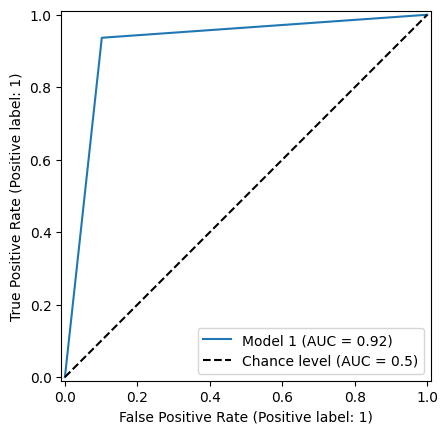

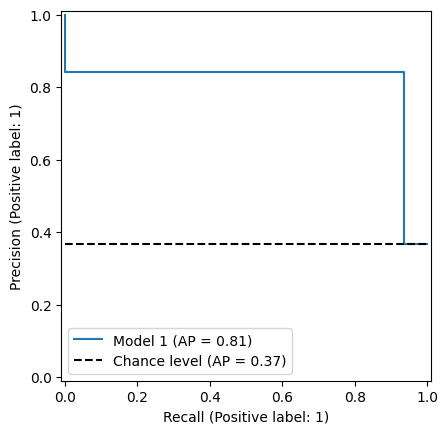

In [64]:
RocCurveDisplay.from_predictions(
    y_test_true_classes, y_test_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_test_true_classes, y_test_pred_classes, name="Model 1", plot_chance_level=True
)

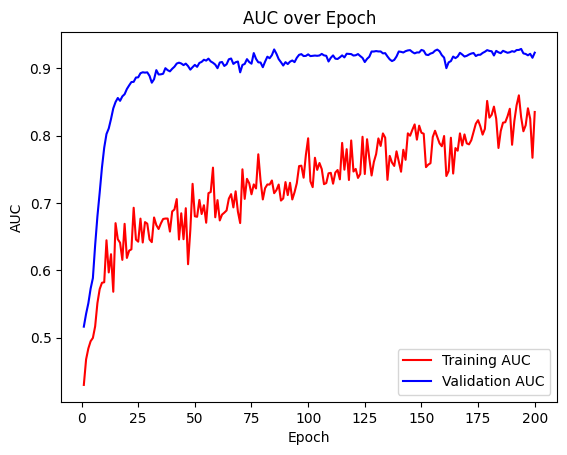

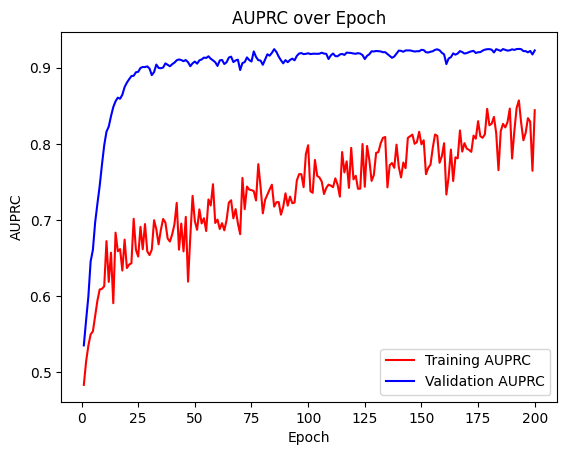

In [215]:
# plot the AUC and AUPRC 
# source: https://stackoverflow.com/questions/63483337/how-can-i-plot-training-accuracy-training-loss-with-respect-to-epochs-in-tensor

auc = history.history['auc_26']
val_auc = history.history['val_auc_26']

auprc = history.history['auc_27']
val_auprc = history.history['val_auc_27']

epochs = range(1, len(auc) + 1)
plt.plot(epochs, auc, 'r', label='Training AUC')
plt.plot(epochs, val_auc, 'b', label='Validation AUC')
plt.legend()
plt.title('AUC over Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.figure()
plt.plot(epochs, auprc, 'r', label='Training AUPRC')
plt.plot(epochs, val_auprc, 'b', label='Validation AUPRC')
plt.legend()
plt.title('AUPRC over Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUPRC')

plt.show()


**Experiment 2 Accuracy Results**
- Training Accuracy: 0.8992805755395683
- Validation Accuracy: 0.875
- Test Accuracy: 0.9239766081871345

### Experiment 3 (For Fun)

In [65]:
m3 = keras.Sequential([
    layers.Input((30,)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1, seed=RANDOM_SEED),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(2),
])

m3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,730 (10.66 KB)

 Trainable params: 2,730 (10.66 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
m3.load_weights('./tf_model_weights/model_init.weights.h5')

In [67]:
m3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001), # lower lr becuz of high epochs  
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[metrics.CategoricalAccuracy(), metrics.AUC(from_logits=True), metrics.AUC(curve='PR', from_logits=True)]
)

In [68]:
neg = (np.argmax(y_train, axis=1) == 0).sum()
pos = (np.argmax(y_train, axis=1) == 1).sum()

total = neg + pos

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
history = m3.fit(
    x_train,
    y_train,
    batch_size=8,
    epochs=200, 
    verbose=2, 
    validation_data=(x_val, y_val), 
    class_weight=class_weight
    )

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
TRAINING DATA


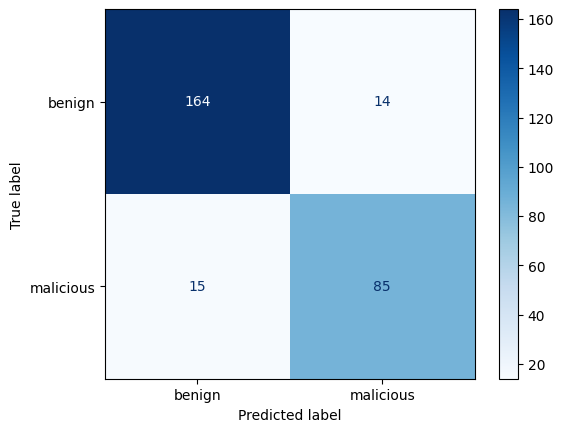

In [70]:
# Create confusion matrix for training data
y_train_pred = m3.predict(x_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true_classes = np.argmax(y_train, axis=1)

conf_matrix = confusion_matrix(y_train_true_classes, y_train_pred_classes)

print('TRAINING DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malicious']).plot(cmap='Blues')


In [71]:
# Train Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_train_true_classes, y_train_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_train_true_classes, y_train_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.89568345323741
Classification Report:
              precision    recall  f1-score   support

      benign       0.92      0.92      0.92       178
   malignant       0.86      0.85      0.85       100

    accuracy                           0.90       278
   macro avg       0.89      0.89      0.89       278
weighted avg       0.90      0.90      0.90       278



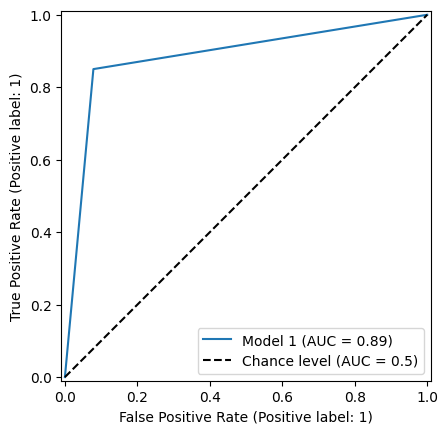

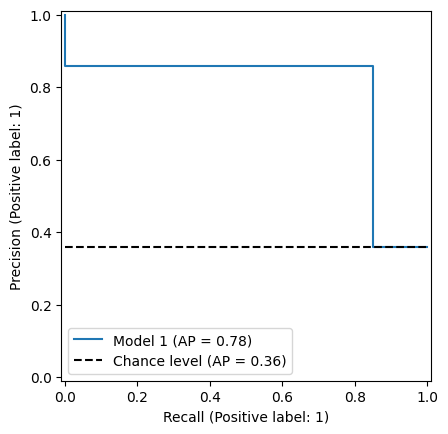

In [72]:
RocCurveDisplay.from_predictions(
    y_train_true_classes, y_train_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_train_true_classes, y_train_pred_classes, name="Model 1", plot_chance_level=True
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
VAL DATA


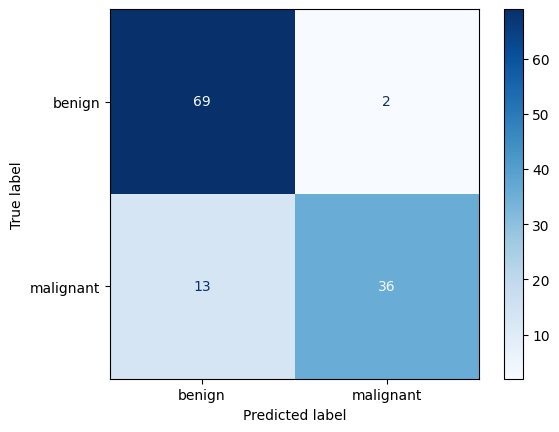

In [73]:
# Create confusion matrix for validation data
y_val_pred = m3.predict(x_val)
y_val_pred_clas2ses = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
print('VAL DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malignant']).plot(cmap='Blues')

In [74]:
# Validation Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_val_true_classes, y_val_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_val_true_classes, y_val_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

      benign       0.84      0.97      0.90        71
   malignant       0.95      0.73      0.83        49

    accuracy                           0.88       120
   macro avg       0.89      0.85      0.86       120
weighted avg       0.88      0.88      0.87       120



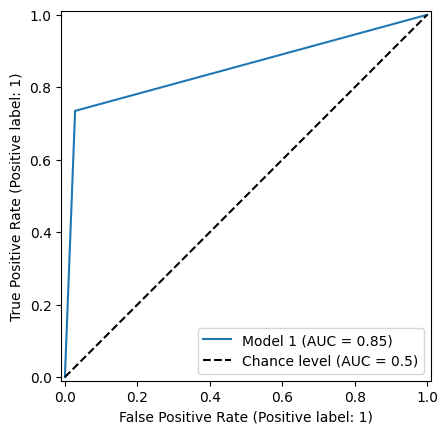

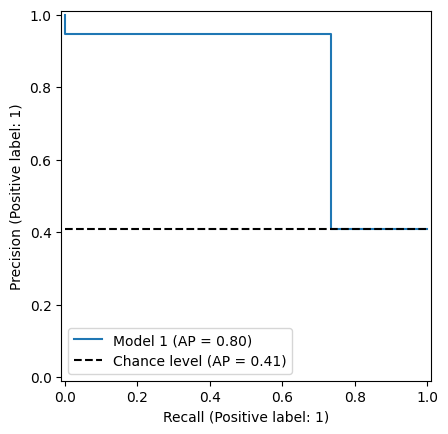

In [75]:
RocCurveDisplay.from_predictions(
    y_val_true_classes, y_val_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_val_true_classes, y_val_pred_classes, name="Model 1", plot_chance_level=True
)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
TEST DATA


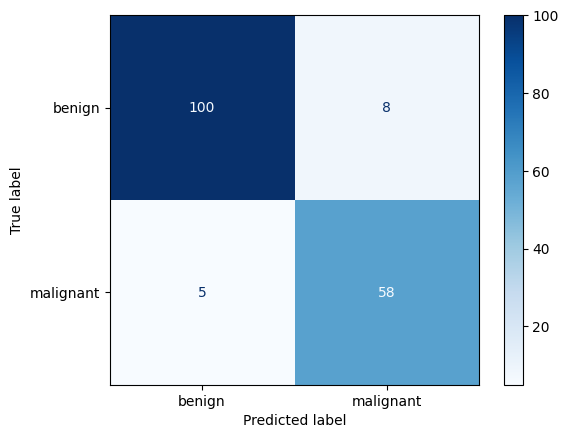

In [77]:
# Create confusion matrix for test data
y_test_pred = m3.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)

print('TEST DATA')
ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'malignant']).plot(cmap='Blues');

In [78]:
# Test Accuracy and Classification Report
print(f'Accuracy: {accuracy_score(y_test_true_classes, y_test_pred_classes)}')
print(f'Classification Report:\n{classification_report(y_test_true_classes, y_test_pred_classes, target_names=["benign", "malignant"])}')

Accuracy: 0.9239766081871345
Classification Report:
              precision    recall  f1-score   support

      benign       0.95      0.93      0.94       108
   malignant       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



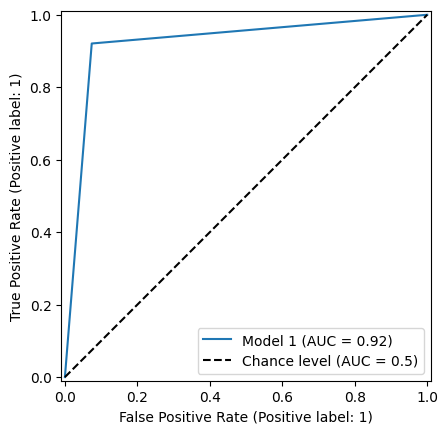

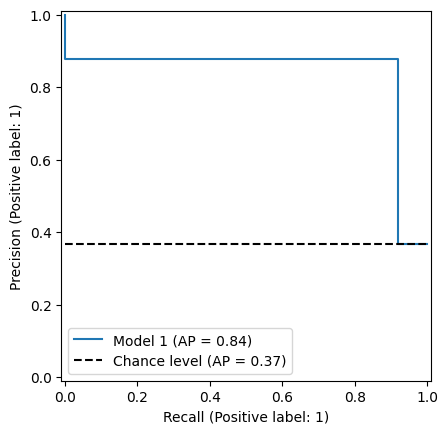

In [79]:
RocCurveDisplay.from_predictions(
    y_test_true_classes, y_test_pred_classes, name="Model 1", plot_chance_level=True
)


display = PrecisionRecallDisplay.from_predictions(
    y_test_true_classes, y_test_pred_classes, name="Model 1", plot_chance_level=True
)

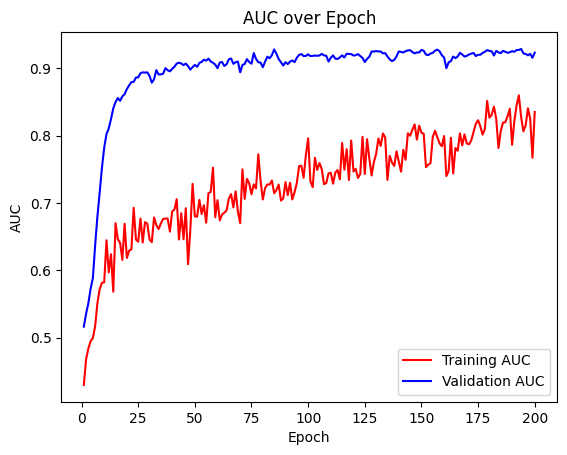

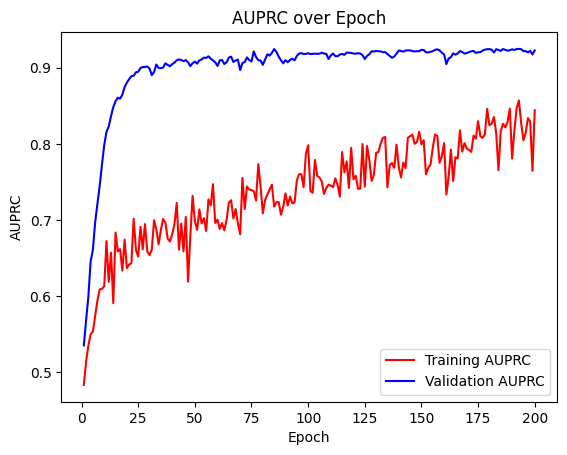

In [232]:
# plot the AUC and AUPRC 
# source: https://stackoverflow.com/questions/63483337/how-can-i-plot-training-accuracy-training-loss-with-respect-to-epochs-in-tensor

auc = history.history['auc_28']
val_auc = history.history['val_auc_28']

auprc = history.history['auc_29']
val_auprc = history.history['val_auc_29']

# Plot the AUC on the y-axis and epochs on the x-axis
epochs = range(1, len(auc) + 1)
plt.plot(epochs, auc, 'r', label='Training AUC')
plt.plot(epochs, val_auc, 'b', label='Validation AUC')
plt.legend()
plt.title('AUC over Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.figure()
plt.plot(epochs, auprc, 'r', label='Training AUPRC')
plt.plot(epochs, val_auprc, 'b', label='Validation AUPRC')
plt.legend()
plt.title('AUPRC over Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUPRC')

plt.show()


**Experiment 3 Accuracy Results**
- Training Accuracy: 0.8992805755395683
- Validation Accuracy: 0.875
- Test Accuracy: 0.9239766081871345

## REPORT

**Model Parameters**
- Model 1. Has 5 Dense layers with 32, 32, 16, 8, and 2 neurons in the respective layers.
- Model 2. Has 5 Dense layers with the same num of neurons. This model also has a Dropout layer with a rate of 0.1 was added after layer 1. A class weighting scheme is applied.
- Model 3. Has 5 Dense layers with the same num of neurons. This model also has a Dropout layer with a rate of 0.1 was added after layer 1. A (potentially) different class weighting scheme is applied.

All the models were compiled with the same loss function and optimizer.

**Interpretation**
- All models performed surprising well, with regard to macro f1 and accuracy, on the Test data compared to their performance on the validation data.

- For examples, Validation Accuracy for all models was 0.875 but the Test Accuracy was 0.92086, 0.92397, and 0.92398 for each model respectively. Also, the Training Accuracy for models 2 and 3 were 0.89928, notably lower than the test accuracy 

- This may indicate that the distribution of validation data differed significantly from that of the training & test data distribution (This is verified below). A potential solution is stratified spliiting, though perhaps a better model, in practice, would result from using a known estimate of the population distribution.

- Lastly, the observant eye would have noticed that the results of model 2 and model 3 are exactly the same, in fact each iteration during training is also exactly the same. This is because the weighting schemes applied are equivalent. This can be verified as, <br/><br/>
$\dfrac{P_1}{N_1} = \dfrac{\dfrac{1}{p} * \dfrac{total}{2}}{\dfrac{1}{n} * \dfrac{total}{2}} = \dfrac{n}{p} = \dfrac{P_2}{N_2}$, <br/><br/> where $P_1$ and $N_1$ are the positive and negative weights applied in scheme 1 and $P_2$ and $N_2$ are the positive and negative weights applied in scheme 2. Thus we conclude that the results are not a matter of coincidence or implementation error, but rather are a result of applying the same class weighting schemes. 

**Resources**
- StackOverflow
- Tensorflow Docs
- Scikit-learn Docs


In [233]:
n_train = (np.argmax(y_train, axis=1) == 0).sum()
p_train = (np.argmax(y_train, axis=1) == 1).sum()

total_train = n_train + p_train

n_val = (np.argmax(y_val, axis=1) == 0).sum()
p_val = (np.argmax(y_val, axis=1) == 1).sum()

total_val = n_val + p_val

n_test = (np.argmax(y_test, axis=1) == 0).sum()
p_test = (np.argmax(y_test, axis=1) == 1).sum()

total_test = n_test + p_test

In [ ]:
# Observing class distribution of the different splits

In [236]:
print(f'The ratio of positive samples in the training data is {p_train/total_train:.4f}')
print(f'The ratio of positive samples in the val data is {p_val/total_val:.4f}')
print(f'The ratio of positive samples in the test data is {p_test/total_test:.4f}')

The ratio of positive samples in the training data is 0.3597
The ratio of positive samples in the val data is 0.4083
The ratio of positive samples in the test data is 0.3684
